In [7]:
!pip install opencv-python 


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.3/38.8 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.7/38.8 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.1/38.8 MB 5.7 MB/s eta 0:00:07
   - -------------------------------------- 1.4/38.8 MB 6.4 MB/s eta 0:00:06
   - -------------------------------------- 1.6/38.8 MB 6.0 MB/s eta 0:00:07
   -- ------------------------------------- 2.0/38.8 MB 6.3 MB/s eta 0:00:06
   -- ------------------------------------- 2.0/38.8 MB 6.3 MB/s eta 0:00:06
   --- ------------------------------------ 3.1/38.8 MB 7.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/38.8 MB 7.7 MB/s eta 0:00:05
   --- ------------------------------------ 3.9/38.8 MB 7.5 MB/s eta 0:00:05
   ---- ----------------------------------- 4.1/38.8 MB 7.4 MB/s eta 0:00:05
   ---

In [46]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv
print(cv.__version__)
import time

def nothing(x):
    pass

# Load the grayscale images. Comment in and out the desired image. Be sure to select the correct image area below.

# when computing the area density for these images, an area of 1088071km^2 is used
#img = cv.imread("Crater Project/MC-02.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-03.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-04.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-05.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-06.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-07.png", cv.IMREAD_GRAYSCALE)

# when computing the area density for these images, an area of is 1111072km^2 used
#img = cv.imread("Crater Project/MC-08.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-09.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-10.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-11.png", cv.IMREAD_GRAYSCALE)
img = cv.imread("Crater Project/MC-12.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-13.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-14.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-15.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-16.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-17.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-18.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-19.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-20.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-21.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-22.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-23.png", cv.IMREAD_GRAYSCALE)

# when computing the area density for these images, an area of 1088071km^2 is used
#img = cv.imread("Crater Project/MC-24.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-25.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-26.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-27.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-28.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread("Crater Project/MC-29.png", cv.IMREAD_GRAYSCALE)
#img = cv.imread('Moon craters.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"

# introduce blur to remove noise, remove blur to acquire smaller craters.
#img = cv.medianBlur(img, 9)
# convert to geyscale
cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

# Create a window and trackbars to alter parameters
cv.namedWindow('Crater Detection')
cv.createTrackbar('Parameter 1', 'Crater Detection', 30, 100, nothing)
cv.createTrackbar('Parameter 2', 'Crater Detection', 3, 100, nothing)
cv.createTrackbar('Min Radius', 'Crater Detection', 0, 100, nothing)
cv.createTrackbar('Max Radius', 'Crater Detection', 50, 100, nothing)

while True:
    # Get current positions of trackbars
    param1 = cv.getTrackbarPos('Parameter 1', 'Crater Detection')
    param2 = cv.getTrackbarPos('Parameter 2', 'Crater Detection')
    min_radius = cv.getTrackbarPos('Min Radius', 'Crater Detection')
    max_radius = cv.getTrackbarPos('Max Radius', 'Crater Detection')
    
    # Detect circles
    craters = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 35,
                              param1=param1, param2=param2,
                              minRadius=min_radius, maxRadius=max_radius)
    
    # Make a copy of the image to draw on
    draw_img = cimg.copy()
    
    if craters is not None:
        craters = np.uint16(np.around(craters))
        for i in craters[0, :]:
            # Draw the outer circle
            #cv.circle(display_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv.circle(draw_img, (i[0], i[1]), 2, (0, 0, 255), 3)
#    else:
#        print("No craters were found.")

    # Show the result
    cv.imshow('Crater Detection', draw_img)
    
    # Exit if 'q' is pressed
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
cv.waitKey(1)


4.10.0


-1

In [42]:
#print(craters)
#print(craters.shape)

# flatten the 3D crater array to 2D
craters2d = craters.reshape(-1, 3)

# sort craters into ascending order of radius
craters2d = craters2d[craters2d[:, 2].argsort()]  
#print(craters2d)

# save sorted crater file as external text file, can be used to check and compare between files. To save multiple change image number.
np.savetxt('craters_MC-02_2d.txt', craters2d)

#print(craters2d[:, 2].size)
#print(np.max(craters2d[:, 2]))

# obtain the cumulative frequency of the craters for increasing radius
craters2d_radius = craters2d[:, 2]
def calculate_cumulative_frequency(array):

  # Create a frequency array
  frequency_array = np.zeros(49, dtype=int)
  for value in array:
    frequency_array[value - 1] += 1

  # Calculate cumulative frequency
  cumulative_frequency = np.cumsum(frequency_array)

  return cumulative_frequency

# apply cumulative frequency function
cumulative_freq = calculate_cumulative_frequency(craters2d_radius)
#print(cumulative_freq)

# calculate total cumulative frequency and frequency density
total_freq = np.max(cumulative_freq)
#print(np.max(total_freq))

# the values of the img area change. for img 02-08 and 24-29: .
#img_area = 1088071
# For 09-23:
img_area = 1111072


freq_density = total_freq / img_area
# gives the final value of the cumulative crater frequency data of the image units are km^-2
print(freq_density)


0.0014049494542207885


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


Text(0.5, 0, 'Crater Radius (km)')

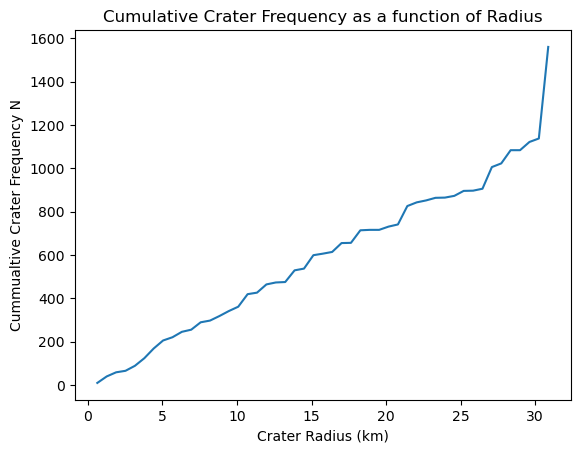

In [44]:

D = np.linspace(1, 49, 49)
print(D)
# produce plot comparing cummulative crater frequency as a function of radius
# 0.63 is the distance in km a pixel represents
plt.plot((D * 0.63), cumulative_freq)
plt.title('Cumulative Crater Frequency as a function of Radius')
plt.ylabel('Cummualtive Crater Frequency N')
plt.xlabel('Crater Radius (km)')